# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [1]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: Does income along with the emploment status have an effect on customer closing their account ?



**Answer**:
- The employment status plays a vital role in determining the reason for the closure of credit cards. The income plays a major role here as well.
- We have a very good observation here from the employment_income dataframe, more than 50% of the Part time employees have closed their credit card accounts.
- Full time employees are also most likely not to close their credit card accounts as it has the lowest percentage of closure compared to the rest. Self-Employed employees don't have a much effect over here
- Considering the income ranges, 
- Customers receiving an income in the range of 75-100k being part time have a 70% probability of closing their credit card accounts.
- Customers receiving an income in the range of 125k and above being part time have a 78% probability of closing their credit card accounts.
- Customers receiving an income in the range of 100k to 125k being part time have a 73% probability of closing their credit card accounts. 

## Supporting Analysis

In [3]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


customer_status,employment_status,num_customers
<fct>,<fct>,<int>
closed_account,full_time,865
closed_account,part_time,1014
closed_account,self_employed,213
active,full_time,1525
active,part_time,513
active,self_employed,497


`summarise()` has grouped output by 'customer_status', 'employment_status'. You
can override using the `.groups` argument.
New names:
• `` -> `...1`


customer_status,employment_status,income_range,Avg_Income,num_customers
<fct>,<fct>,<chr>,<dbl>,<int>
closed_account,part_time,Range(100k - 125k),107665.57,93
closed_account,part_time,Range(125k and above),143732.95,87
closed_account,part_time,Range(30k - 35k),33612.44,226
closed_account,part_time,Range(35k - 50k),39446.16,310
closed_account,part_time,Range(50k - 75k),61953.16,190
closed_account,part_time,Range(75k - 100k),90476.76,108
active,part_time,Range(100k - 125k),108905.21,34
active,part_time,Range(125k and above),143389.62,26
active,part_time,Range(30k - 35k),33358.73,101


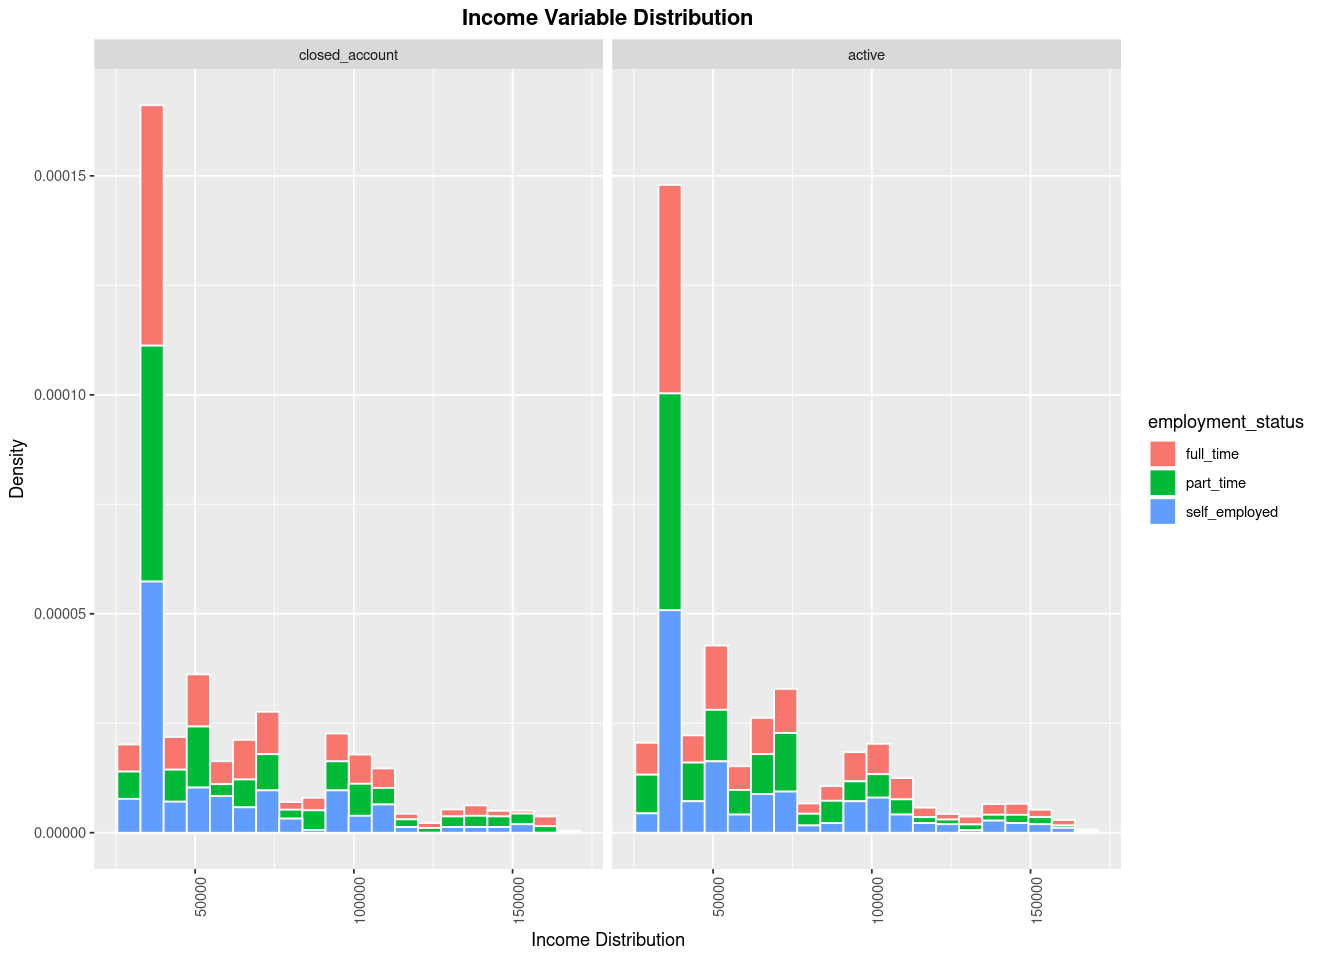

In [4]:
#Summary statistics grouping by customer status
#Lets group the income into ranges

#Dividing the income into different ranges and placing the customers in it
credit_card_df$income_range = ifelse(credit_card_df$income >= 30000 & credit_card_df$income <=35000, "Range(30k - 35k)", 
									ifelse(credit_card_df$income >50000 & credit_card_df$income <= 75000, "Range(50k - 75k)", 
										  ifelse(credit_card_df$income > 75000 & credit_card_df$income <= 100000, 
												 "Range(75k - 100k)", 
												 ifelse(credit_card_df$income > 100000 &  credit_card_df$income <= 125000, 
														"Range(100k - 125k)", ifelse(credit_card_df$income >35000 & 
																					 credit_card_df$income <=50000, 
																					  "Range(35k - 50k)", 
																					  "Range(125k and above)")))))

#Summarizing customer_status, income range and employment status
employment_income = credit_card_df %>% group_by(customer_status, employment_status) %>% summarise(
	num_customers = n()
)
employment_income

#Income Range with Part time and Full Time only
income_customerStatus = credit_card_df %>% group_by(customer_status, employment_status , income_range) %>% summarise(
	Avg_Income = round(mean(income),2),
	num_customers = n()
) %>% filter(employment_status %in% c("part_time"))

income_customerStatus

#Histogram wth customer status as facet
ggplot(credit_card_df, aes(x = income,  fill = employment_status)) + 
	geom_histogram(aes(y = after_stat(density)), bins = 20, color = 'white') +  
facet_wrap(~customer_status) +
labs(
    x = 'Income Distribution',
    y = 'Density',
    title = 'Income Variable Distribution'
  ) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
        axis.text.x = element_text(angle = 90, hjust = 1))

## Question 2


**Question**: Does owning a lot of accounts and being inactive have an effect on customer closing their credit card account ?



**Answer**:
- From this statistical summary we can find that, Customers holding 1 or 2 accounts meaning who don't have much of experience with using credit cards are more likely to close their account compared to the rest. The probability of people closing their accounts is around 0.7 which is very high and these people are likely to close their accounts.
- People owning 3+ accounts are most likely not to close their accounts as the probability of being active ranges between 0.5 to 0.7. 
- By filtering out the 1 and 2 account holders, we can see that there is a 100% probability that a person will close the account if he is not at all active. An interseting fact here, people who own inactive for more than 3 months which is 3,4,5 months have a probability ranging between 70-88% chances of closing their account.
- To put all findings together, If a person owns 1 or 2 acounts and his inactive for 3 to 5 months he has a 80% probability of closing his account.

## Supporting Analysis


`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


customer_status,total_accounts,total_customers,percentage_per_account_held
<fct>,<dbl>,<int>,<dbl>
closed_account,1,296,0.60
closed_account,2,447,0.64
active,3,575,0.53
active,4,496,0.64
active,5,520,0.64
active,6,494,0.66


`summarise()` has grouped output by 'customer_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


customer_status,months_inactive_last_year,total_customers
<fct>,<dbl>,<int>
closed_account,0,5
closed_account,1,50
closed_account,2,208
closed_account,3,392
closed_account,4,63
closed_account,5,18
closed_account,6,7
active,1,127
active,2,143


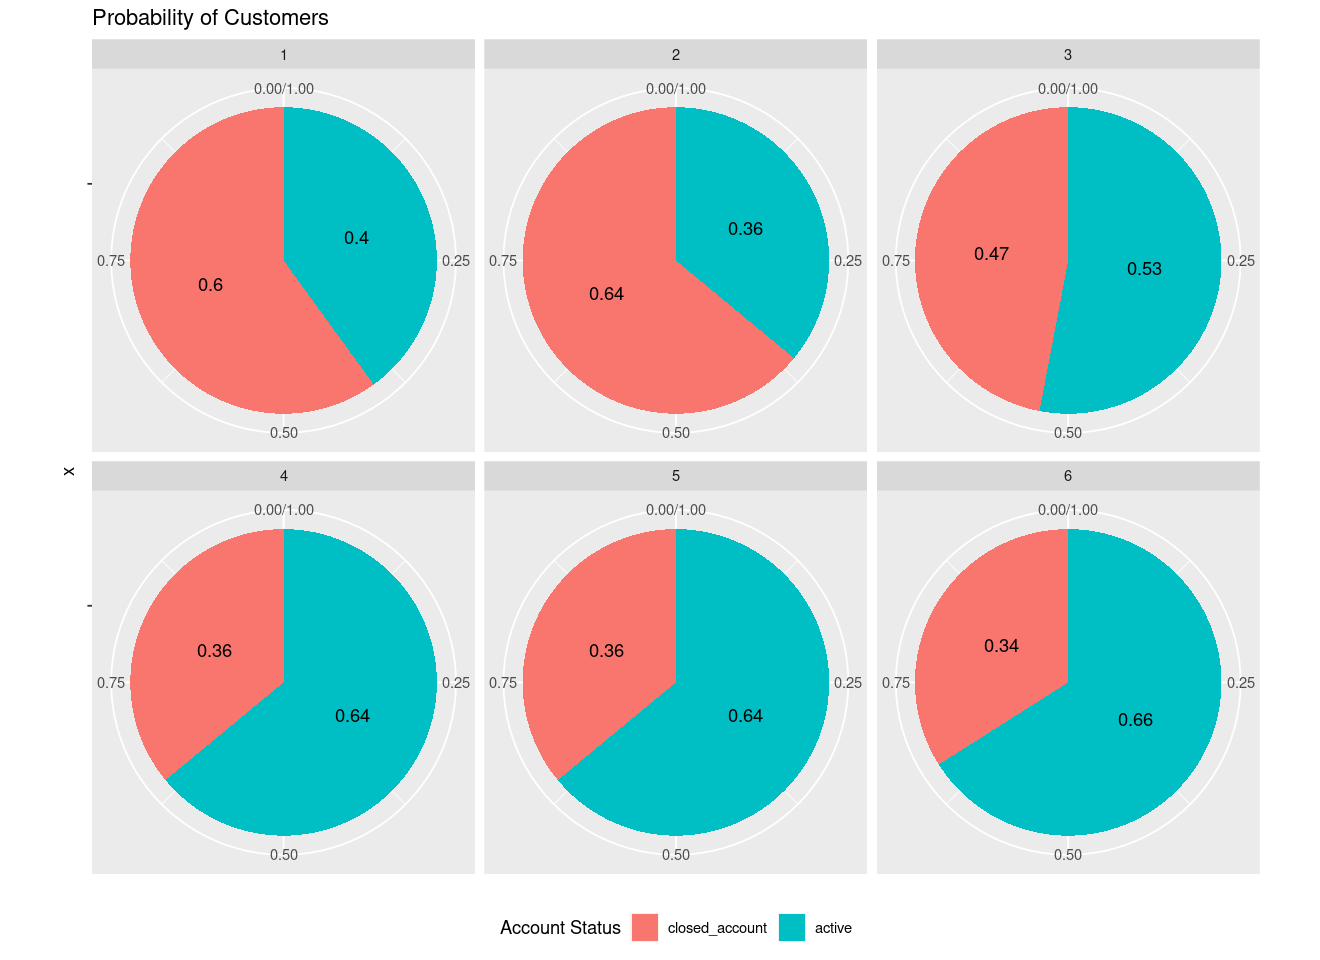

In [5]:
#Summary statistics for customer owning accounts
total_accounts_customer = credit_card_df %>% group_by(customer_status, total_accounts) %>% summarize(
	total_customers = n()
)
total_accounts_percent = total_accounts_customer %>% group_by(total_accounts) %>% summarize(
	total_customers = sum(total_customers)
)

total_accounts_customer <- total_accounts_customer %>%
  left_join(total_accounts_percent, by = "total_accounts") %>% 
  rename(total_customers = total_customers.x)

total_accounts_customer$percentage_per_account_held = 
round(total_accounts_customer$total_customers/total_accounts_customer$total_customers.y,2)
total_accounts_customer <- total_accounts_customer %>%
  select(-total_customers.y)

#Customer Owning Accounts
total_accounts_customer_higher_probability <- total_accounts_customer %>% filter(percentage_per_account_held > 0.5)
total_accounts_customer_higher_probability

#Months Inactive
monthsInactive = credit_card_df %>% filter(total_accounts == 1|total_accounts ==2) %>% group_by(customer_status, months_inactive_last_year) %>% summarise(
	total_customers = n()
)
monthsInactive

#Pie Chart Representation
ggplot(total_accounts_customer, aes(x = "", y = percentage_per_account_held, fill = customer_status)) +
  geom_bar(stat = "identity", width = 1) +
  geom_text(aes(label = round(percentage_per_account_held,2)), position = position_stack(vjust = 0.5)) +
  coord_polar("y", start = 0) +
  facet_wrap(~total_accounts) +
  theme(legend.position = "bottom") +
  labs(title = "Probability of Customers", fill = "Account Status", y = NULL)


## Question 3


**Question**: Does Credit limit with card typehave an effect on the customer status ?



**Answer**:
- The credit limit along with the credit card type does not have a huge effect on the customer status but we are able to have some conclusions which will be useful for us as well.
- Card type blue owners have a probability ranging arround 0.5 probability of having their accounts closed in the future irrespective of the credit limit they have.
- If customers have a credit limit 15 to 20k and owning a silver card have 80% probability of not closing their account. They are the best customers and can be attracted with offers. Gold Card owners having the same limit also have a 78% probability of not closing their account who are to be called the best customers for the credit card company.
- As a whole, Gold and Silver card owners have a huge profit margin to the company while as Blue card owners have a less profit margin for the company and are likely to be closing their account.
- Blue card owners can be given less offers and more charges on their account. Credit limit 5k and blue card owners have a 62% probability of closing their credit card account.

## Supporting Analysis


`summarise()` has grouped output by 'customer_status', 'credit_limit_ranges'.
You can override using the `.groups` argument.
`summarise()` has grouped output by 'card_type'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


customer_status,credit_limit_ranges,card_type,number_of_customers,percentage_customers
<fct>,<chr>,<fct>,<int>,<dbl>
closed_account,credit limit 15k-20k,blue,70,0.56
closed_account,credit limit 5k,blue,860,0.62
closed_account,credit limit 5k-15k,blue,411,0.55
closed_account,credit limit >30k,blue,96,0.56
active,credit limit 15k-20k,silver,51,0.84
active,credit limit 15k-20k,gold,36,0.78
active,credit limit 20k-30k,blue,66,0.52
active,credit limit 20k-30k,silver,49,0.71
active,credit limit 20k-30k,gold,34,0.67


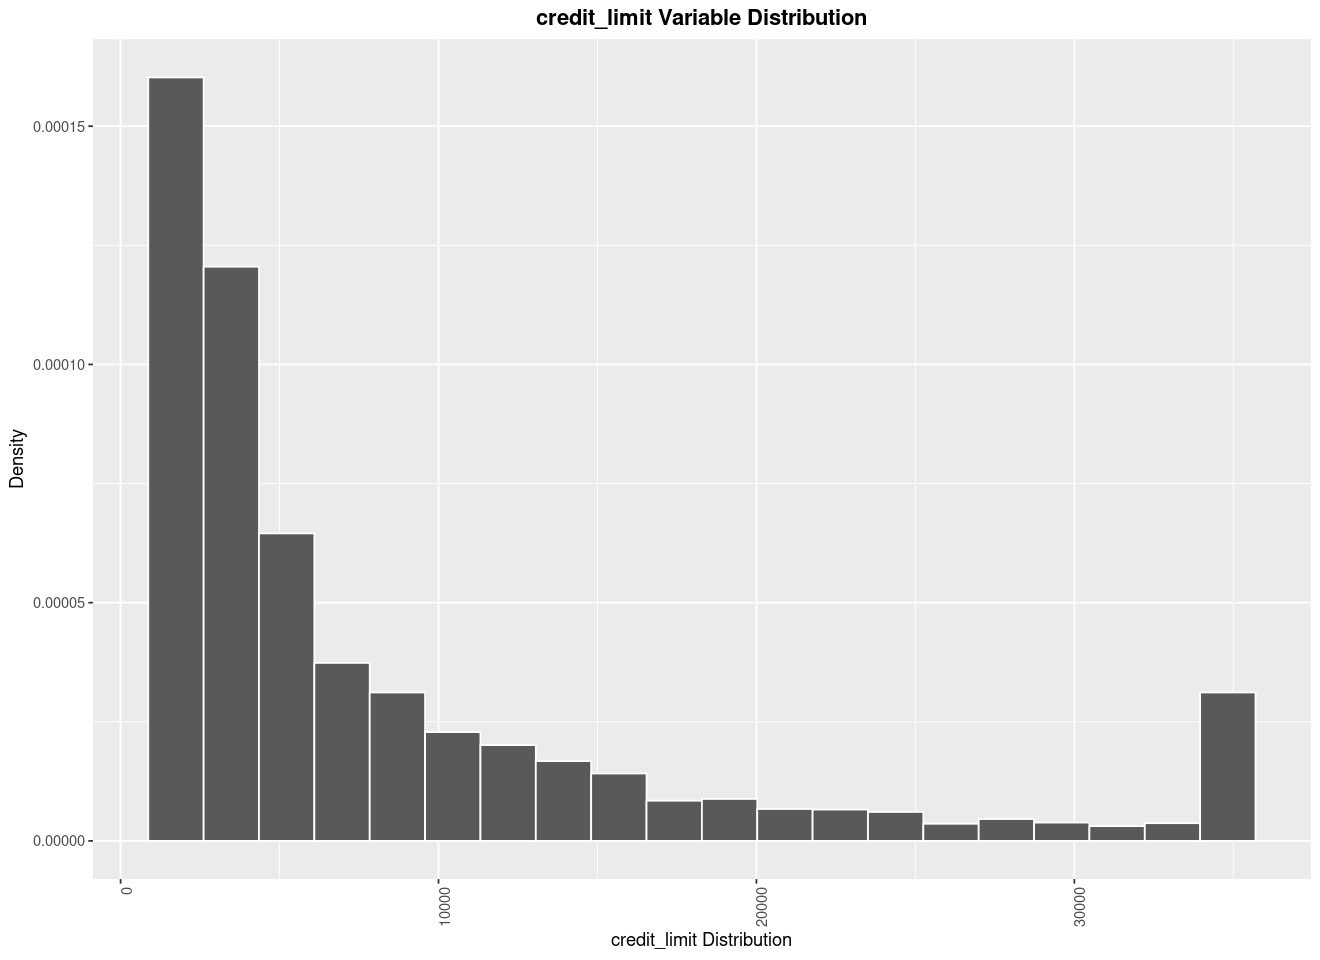

In [6]:
#Let's check the distribution of credit limit variable on a histogram before performing statistical analysis
ggplot(credit_card_df, aes(x = credit_limit)) + 
	geom_histogram(aes(y = after_stat(density)), bins = 20, color = 'white') +
labs(
    x = 'credit_limit Distribution',
    y = 'Density',
    title = 'credit_limit Variable Distribution'
  ) +
  theme(plot.title = element_text(hjust = 0.5, face = 'bold'), 
        axis.text.x = element_text(angle = 90, hjust = 1))

#We have a lot of values occuring below 10k credit_limit and the limit gradually decreases. Let's set the ranges and have a look at the distribution
credit_card_df$credit_limit_ranges = 
ifelse(credit_card_df$credit_limit > 0 & credit_card_df$credit_limit <= 5000, "credit limit 5k", ifelse(
	credit_card_df$credit_limit > 5000 & credit_card_df$credit_limit <= 15000, "credit limit 5k-15k", ifelse(
		credit_card_df$credit_limit > 15000 & credit_card_df$credit_limit <= 20000, "credit limit 15k-20k", ifelse(
			credit_card_df$credit_limit > 20000 & credit_card_df$credit_limit <= 30000, "credit limit 20k-30k", "credit limit >30k"
		)
	)
))

credit_limit_summarization = credit_card_df %>% group_by(customer_status, credit_limit_ranges, card_type) %>% summarise(
	number_of_customers = n()
)

card_type_total_cust = credit_limit_summarization %>% group_by(card_type, credit_limit_ranges) %>% summarize(
	total_customers = sum(number_of_customers)
)
cred_card_limit_type <- credit_limit_summarization %>%
  left_join(card_type_total_cust, by = c("card_type", "credit_limit_ranges"))

cred_card_limit_type$percentage_customers = 
round(cred_card_limit_type$number_of_customers/cred_card_limit_type$total_customers,2)

cred_card_limit_type_greater_0_5 <- cred_card_limit_type %>% filter(percentage_customers > 0.5) %>%
  select(-total_customers)
cred_card_limit_type_greater_0_5



## Question 4


**Question**: Whats the combination of marrital status, education and dependants effect on account closure ?



**Answer**:
- An important view here, any person with education status as doctorate have a 60% + possibility of closing their account.
- Married Doctorates who have 2-3 dependants have a 60% possibility of closing their account and there are arround 33 occurences of this combination.
- Divorced Doctorates have a 70% possibility of closing their accounts.
- Other than all these some low occurences of values such as Divorced Doctorates with 0-1 dependants (100%), Single doctorates with 4-5 dependants(60%) also have a high probability of account closure.
- Single Bachelors with 0-1 dependants have a 51% probability of account closure.

## Supporting Analysis


`summarise()` has grouped output by 'education', 'marital_status',
'dependents_range'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'education', 'marital_status'. You can
override using the `.groups` argument.
New names:
• `` -> `...1`


education,marital_status,dependents_range,customer_status,number_of_customers,percentage_customers
<fct>,<fct>,<chr>,<fct>,<int>,<dbl>
bachelors,single,Dependents 0 or 1,closed_account,27,0.51
masters,divorced,Dependents 0 or 1,closed_account,20,0.56
doctorate,single,Dependents 2 or 3,closed_account,30,0.51
doctorate,single,Dependents 4 or 5,closed_account,12,0.60
doctorate,married,Dependents 0 or 1,closed_account,15,0.60
doctorate,married,Dependents 2 or 3,closed_account,33,0.60
doctorate,divorced,Dependents 0 or 1,closed_account,1,1.00
doctorate,divorced,Dependents 2 or 3,closed_account,9,0.75


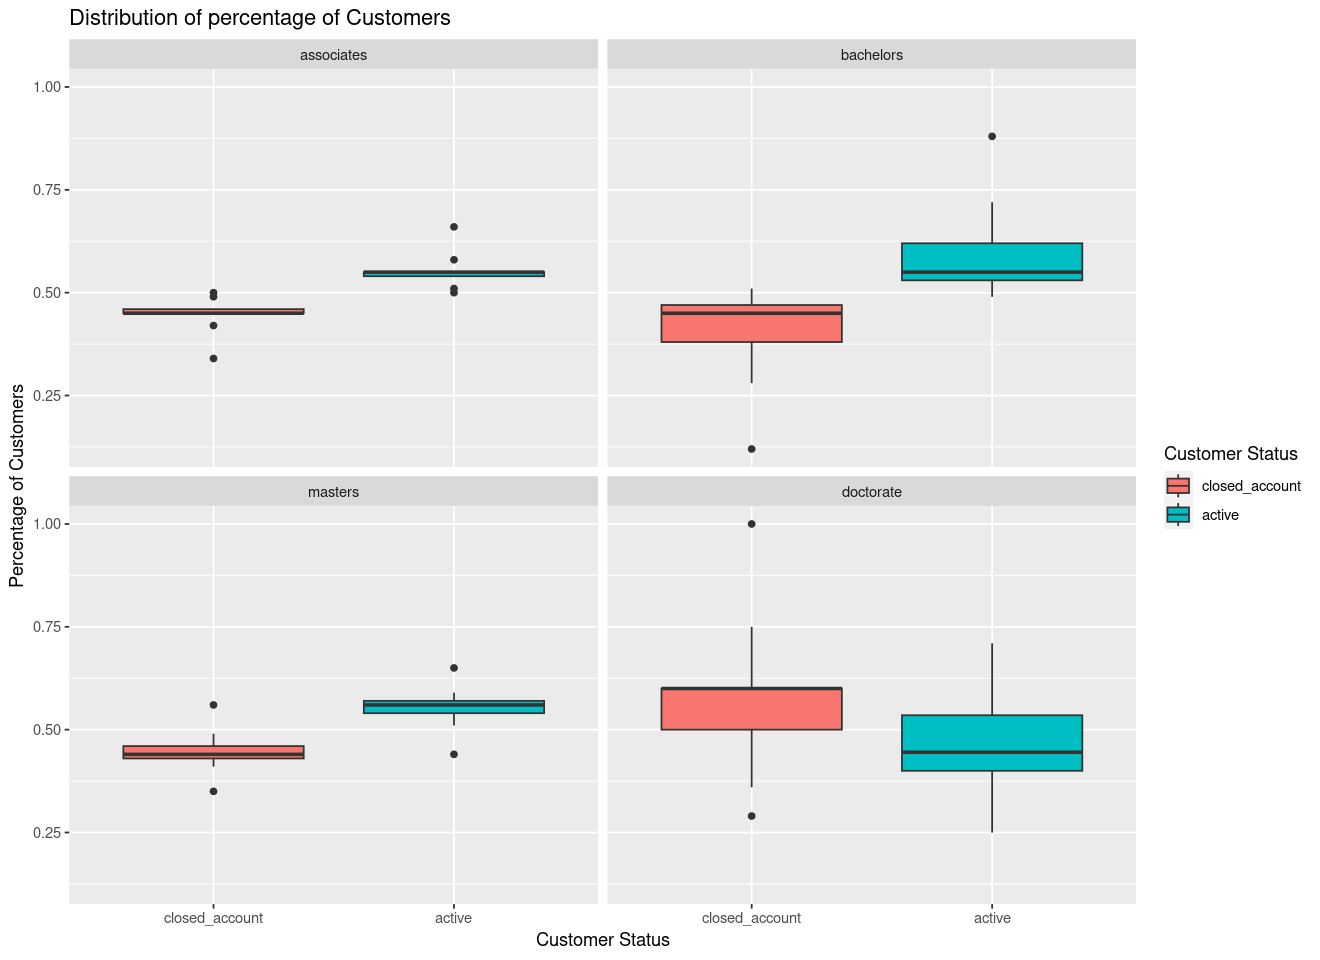

In [7]:
#Tabulating the dependants
credit_card_df$dependents_range = ifelse(
	credit_card_df$dependents == 0 | credit_card_df$dependents == 1, "Dependents 0 or 1", ifelse(
		credit_card_df$dependents == 2 | credit_card_df$dependents == 3, "Dependents 2 or 3", 
		"Dependents 4 or 5"
	))

education_marrital_dependants = credit_card_df %>% group_by(education, marital_status, dependents_range, 
															customer_status) %>% summarise(
	number_of_customers = n()	
)

education_marrital_dependants_total = education_marrital_dependants %>% 
group_by(education, marital_status, dependents_range) %>% summarise(
	total_customers = sum(number_of_customers)
)

educ_marr_dep <- education_marrital_dependants %>%
  left_join(education_marrital_dependants_total, by = c("education", "marital_status", "dependents_range"))

educ_marr_dep$percentage_customers = 
round(educ_marr_dep$number_of_customers/educ_marr_dep$total_customers,2)

#Let's check what percent of customers have closed their accounts and what's the reason
educ_marr_dep_greater_0.5 <- educ_marr_dep %>% filter(percentage_customers > 0.5 & 
													  customer_status == "closed_account") %>%
  select(-total_customers)

educ_marr_dep_greater_0.5

#Visualization - Box Plot
ggplot(educ_marr_dep, aes(x = customer_status, y = percentage_customers)) +
geom_boxplot(aes(fill = customer_status)) + facet_wrap(~education) +
  labs(title = "Distribution of percentage of Customers", x = "Customer Status", 
	   y = "Percentage of Customers", fill = "Customer Status")



## Question 5


**Question**: 

A) What are the variables that have heavy correlation with each other in the dataset. Are there any variables which might cause biases in the data ?

B) What's the effect of Age on the customer status ?

**Answer**:

**Answer for Question A**
- We can see heavy correlation for some values. These values have to be taken into account which might create biases while fitting models. The high correlated values are given here. 
- We have correlation between age and months_since_first_account variables for a value of 0.78. 
- Correlation between home and utilization_ratio is -0.26 which is heavily correlated as well.
- Correlation between utilization_ratio and credit_limit is -0.39 which shows heavy correlation.
- Correlation between transactions_last_year and total_spend_last_year is 0.80 which shows heavy correlation. 
- All these variables if they are together may cause the model to perform badly and give incorrect results.

**Answer for Question B**
- There is no much independent effect with the age variable. We see almost equal distribution among the closed and active accounts.
- Age 55+ have a 46% probability of closing their account which is the highest. All ages have a range of 40 to 45% which is a decent distribution.
- As a summarization, Age does not have any effect.


## Supporting Analysis


,age,dependents,income,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
age,1.000000000,-0.122379861,0.032684171,0.78386505,-0.0305059769,0.118823391,-0.0315563007,0.02290913,-0.002772582,-0.02099754,-0.04854167,-0.06355823,-0.012912324
dependents,-0.122379861,1.000000000,0.065184013,-0.10277863,-0.0331471801,-0.036625537,-0.0270153933,0.06760553,-0.032340138,-0.04183954,0.02901316,0.04421638,-0.008521632
income,0.032684171,0.065184013,1.000000000,0.03165864,-0.0508083806,-0.007390561,0.0213872271,0.58869950,-0.261627199,0.03056771,0.08413525,0.02139190,0.018368240
months_since_first_account,0.783865053,-0.102778625,0.031658644,1.00000000,-0.0174133926,0.164303352,-0.0259349754,0.01997201,-0.021917626,-0.01398172,-0.05797893,-0.05656761,-0.017799279
total_accounts,-0.030505977,-0.033147180,-0.050808381,-0.01741339,1.0000000000,-0.036829715,-0.0004428936,-0.07706769,0.072572827,0.04558544,-0.22243969,-0.08669225,0.062869385
months_inactive_last_year,0.118823391,-0.036625537,-0.007390561,0.16430335,-0.0368297147,1.000000000,0.0573350432,-0.01341449,-0.048752511,-0.04018113,-0.06674531,-0.11002605,-0.091511087
contacted_last_year,-0.031556301,-0.027015393,0.021387227,-0.02593498,-0.0004428936,0.057335043,1.0000000000,0.02775994,-0.094725162,-0.05391728,-0.11601900,-0.18448091,-0.124286880
credit_limit,0.022909127,0.067605528,0.588699502,0.01997201,-0.0770676905,-0.013414491,0.0277599421,1.00000000,-0.393624401,0.04091183,0.21139728,0.12285812,0.025053156
utilization_ratio,-0.002772582,-0.032340138,-0.261627199,-0.02191763,0.0725728266,-0.048752511,-0.0947251618,-0.39362440,1.000000000,0.02981748,-0.04419935,0.06280685,0.096960459
spend_ratio_q4_q1,-0.020997542,-0.041839536,0.030567707,-0.01398172,0.0455854420,-0.040181129,-0.0539172777,0.04091183,0.029817478,1.00000000,0.16775559,0.12842767,0.390293965


`summarise()` has grouped output by 'age_range'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


age_range,customer_status,number_of_customers
<chr>,<fct>,<int>
Age 25 to 35,closed_account,160
Age 25 to 35,active,237
Age 35 to 45,closed_account,787
Age 35 to 45,active,943
Age 45 to 55,closed_account,878
Age 45 to 55,active,1045
Age 55 to 65,closed_account,264
Age 55 to 65,active,307
Age 65 and above,closed_account,3


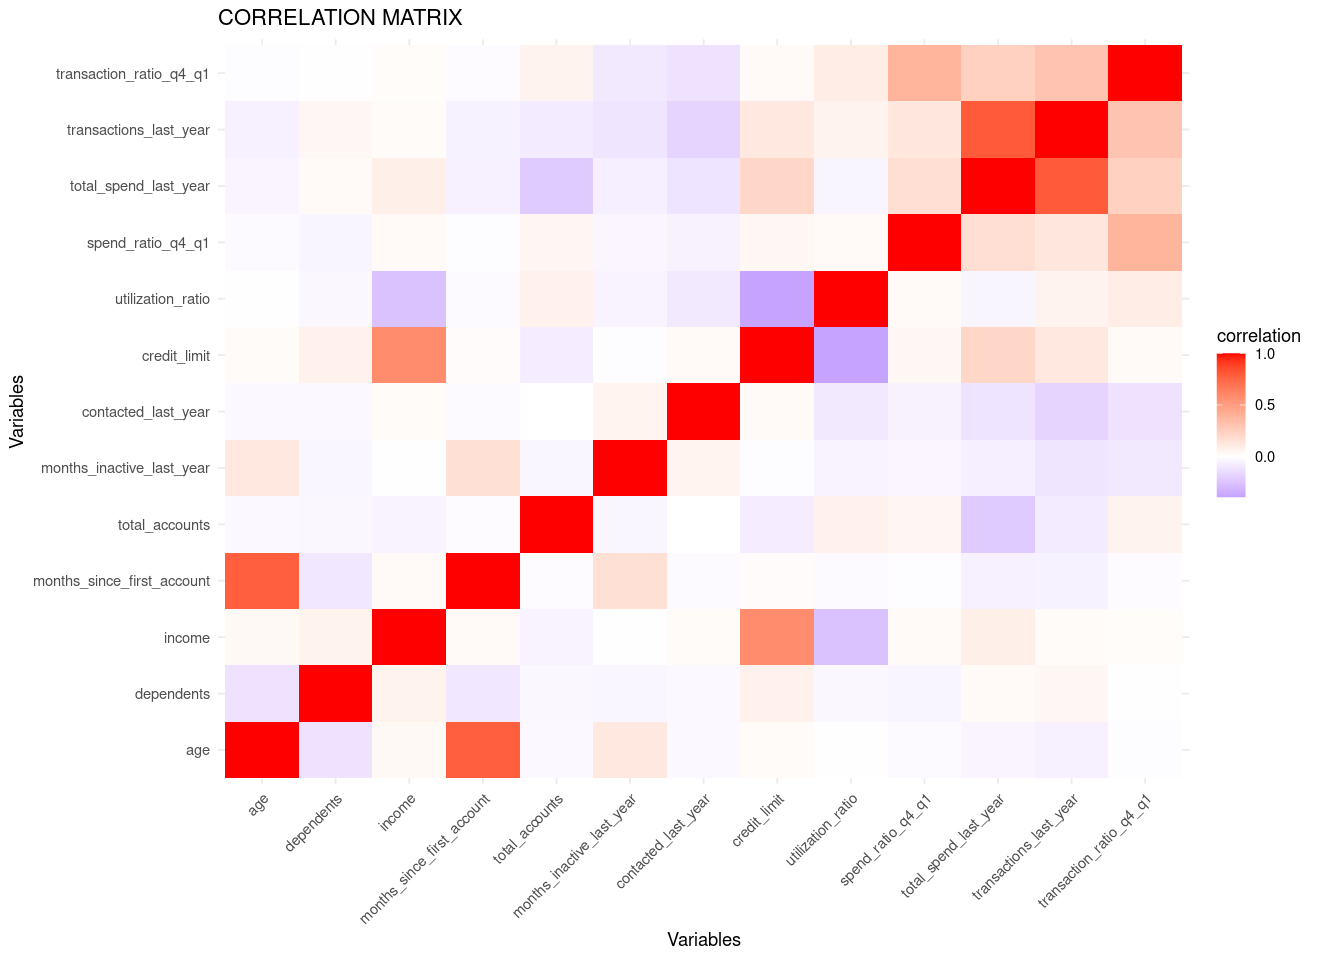

In [8]:
#Correlation matrix - continous variables
#Question A
credit_card_df_continous = credit_card_df[,-c(1,4,5,6,8,19,20,21)]

corr_matrix <- cor(credit_card_df_continous)

ggplot(data = reshape2::melt(cor(credit_card_df_continous))) + 
  geom_tile(aes(x = Var1, y = Var2, fill = value)) + 
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() + 
  labs(
    x = 'Variables',
    y = 'Variables',
    title = 'CORRELATION MATRIX',
    fill = 'correlation'
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

corr_matrix
#corr_matrix[["transactions_last_year", "total_spend_last_year"]]

#Question B
#Dividing the age into ranges
credit_card_df$age_range = ifelse(credit_card_df$age >= 25 & credit_card_df$age <=35, "Age 25 to 35", ifelse(
	credit_card_df$age > 35 & credit_card_df$age <= 45, "Age 35 to 45", ifelse(
		credit_card_df$age > 45 & credit_card_df$age <= 55, "Age 45 to 55", ifelse(
			credit_card_df$age > 55 & credit_card_df$age <= 65, "Age 55 to 65", "Age 65 and above"
		)
	)
))

#Summarising results
credit_card_df %>% group_by(age_range, customer_status) %>% summarise(
	number_of_customers = n()
	
)

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [9]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.4.1.tar.gz' ...
	OK [downloaded 2.4 Mb in 0.2 secs]
Installing vip [0.4.1] ...
	OK [installed binary]
Moving vip [0.4.1] into the cache ...
	OK [moved to cache in 0.36 milliseconds]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [10]:
# Create a data split object
library(tidymodels)
initialSplit <- initial_split(credit_card_df, 
                            prop = 0.75, 
                            strata = customer_status)

# Create the training data
trainingSet <- initialSplit %>%
  training()

# Create the test data
testSet <- initialSplit %>% 
  testing()

# Check number of rows in each dataset
print(paste("The number of rows in training set is",nrow(trainingSet)))
print(paste("The number of rows in test set is",nrow(testSet)))

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



[1] "The number of rows in training set is 3470"
[1] "The number of rows in test set is 1157"


In [11]:
#Applying Cross-Validation
set.seed(200)
folds <- vfold_cv(trainingSet, v = 5, strata = customer_status)

cc_metrics = metric_set(roc_auc, sens, spec, accuracy)

## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [12]:
#Checking Correlation
cor_matrix = trainingSet %>% 
  select_if(is.numeric) %>%
  cor()
cor_matrix

#Correlated values above 0.8
high_correlations <- which(upper.tri(cor_matrix, diag = TRUE) & cor_matrix > 0.8, arr.ind = TRUE)

# Extract and display the correlated variable pairs and their correlation values
correlated_pairs <- data.frame(
  variable1 = rownames(cor_matrix)[high_correlations[, 1]],
  variable2 = colnames(cor_matrix)[high_correlations[, 2]],
  correlation = cor_matrix[high_correlations]
)

correlated_pairs

#We have one highly correlated pair which is total_spend_last_year and transactions_last_year

,age,dependents,income,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
age,1.000000000,-0.111148566,0.023464015,0.78072755,-0.037568039,0.106357634,-0.031040836,0.018492913,0.006815233,-0.03550240,-0.05688119,-0.06321427,-0.016571666
dependents,-0.111148566,1.000000000,0.066701784,-0.09244893,-0.026431910,-0.034097001,-0.019379971,0.067423778,-0.031452196,-0.04101521,0.01812018,0.03106093,-0.002056161
income,0.023464015,0.066701784,1.000000000,0.02940365,-0.044613695,-0.007050283,0.007725913,0.591865241,-0.265650041,0.03001166,0.08183022,0.01899277,0.027223305
months_since_first_account,0.780727550,-0.092448928,0.029403647,1.00000000,-0.028352519,0.147918663,-0.020617207,0.022450806,-0.012281634,-0.02075809,-0.05722483,-0.04862798,-0.013244874
total_accounts,-0.037568039,-0.026431910,-0.044613695,-0.02835252,1.000000000,-0.043583093,-0.002959713,-0.077806033,0.063699369,0.05437818,-0.22438974,-0.09230252,0.060178975
months_inactive_last_year,0.106357634,-0.034097001,-0.007050283,0.14791866,-0.043583093,1.000000000,0.067292537,-0.008103874,-0.043128147,-0.03312009,-0.06790433,-0.11078572,-0.083090692
contacted_last_year,-0.031040836,-0.019379971,0.007725913,-0.02061721,-0.002959713,0.067292537,1.000000000,0.018722329,-0.101464927,-0.06008549,-0.12276067,-0.18710320,-0.145088531
credit_limit,0.018492913,0.067423778,0.591865241,0.02245081,-0.077806033,-0.008103874,0.018722329,1.000000000,-0.394613998,0.04257304,0.20944247,0.12767772,0.036091996
utilization_ratio,0.006815233,-0.031452196,-0.265650041,-0.01228163,0.063699369,-0.043128147,-0.101464927,-0.394613998,1.000000000,0.02034946,-0.04086985,0.07026140,0.090913382
spend_ratio_q4_q1,-0.035502404,-0.041015214,0.030011659,-0.02075809,0.054378178,-0.033120087,-0.060085486,0.042573040,0.020349455,1.00000000,0.16374840,0.13322595,0.389991366


variable1,variable2,correlation
<chr>,<chr>,<dbl>
age,age,1.0000000
dependents,dependents,1.0000000
income,income,1.0000000
months_since_first_account,months_since_first_account,1.0000000
total_accounts,total_accounts,1.0000000
months_inactive_last_year,months_inactive_last_year,1.0000000
contacted_last_year,contacted_last_year,1.0000000
credit_limit,credit_limit,1.0000000
utilization_ratio,utilization_ratio,1.0000000


## **SKEWNESS CHECK OF VARIABLES**

In [13]:
#Checking Skewness of variables to see if any alteration is required
install.packages("moments")
library(moments)
skewness_df = data.frame(Variable_Name = character(), skewness = numeric(), stringsAsFactors =
                           FALSE)
for(i in names(credit_card_df)){
  if(is.numeric(credit_card_df[[i]])){
    value = skewness(credit_card_df[[i]], na.rm=TRUE)
    skewness_df = rbind(skewness_df, data.frame(Variable_Name = i, skewness = value,
                                              stringsAsFactors = FALSE))
  }

}
skewness_df

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/moments_0.14.1.tar.gz' ...
	OK [downloaded 52.9 Kb in 0.6 secs]
Installing moments [0.14.1] ...
	OK [installed binary]
Moving moments [0.14.1] into the cache ...
	OK [moved to cache in 0.3 milliseconds]


Variable_Name,skewness
<chr>,<dbl>
age,-0.05785066
dependents,-0.07756795
income,1.17453573
months_since_first_account,-0.14983590
total_accounts,-0.03255678
months_inactive_last_year,0.52094196
contacted_last_year,0.11924056
credit_limit,1.71242383
utilization_ratio,1.00168177


We have very high positive skewness and negative skewness for certain variables. This skewness may cause several biases in the data and so it is necessary to have a common range for all values so that the algorithm considers all values as the same and calculates without any biases in the data.
Certain variables with high skewness include total_spend_last_year, credit_limit, age, dependants

In [14]:
#Building the engineering pipeline by removing the correlated variables which are above 0.8
credit_card_training_recipe <- recipe(customer_status ~.,
                        data = trainingSet) %>% 

  step_corr(all_numeric(), threshold = 0.85) %>%
 step_normalize(all_numeric()) %>% 
step_dummy(all_nominal(), -all_outcomes())

credit_card_training_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 21



── Operations 

• Correlation filter on: all_numeric()

• Centering and scaling for: all_numeric()

• Dummy variables from: all_nominal() and -all_outcomes()



## Model 1 Training

In [15]:
#Lets fit a Logistic Regression - Linear model
#Modeling without HyperParameter Tunning
logistic_model <- logistic_reg() %>% 
	set_engine("glm") %>%
	set_mode("classification")

#creating the workflow with the model
cc_logistic_wkflw <- workflow() %>% 
	add_model(logistic_model) %>% 
	add_recipe(credit_card_training_recipe)

#Training the best wkflw to the test set
cc_fit <- cc_logistic_wkflw %>% 
  last_fit(split = initialSplit)

# View performance metrics
cc_fit %>% 
  collect_metrics()

#Accuracy - 85.2%

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8694901,Preprocessor1_Model1
roc_auc,binary,0.9435193,Preprocessor1_Model1


In [16]:
#Modeling with HyperParameter Tunning - Logistic Regression with Folds
install.packages("glmnet")
logistic_tune_model <- logistic_reg(mode = "classification", engine = "glmnet",
                    penalty = tune(), mixture = tune())

cc_logistic_tuned_wkflw <- cc_logistic_wkflw %>% 
	update_model(logistic_tune_model)
cc_logistic_tuned_wkflw

## specify tuning grid (hyperparameter search space)
g <- expand_grid(penalty = c(0,1,2),
                 mixture = seq(0,1,by=0.2))

## tune logistic regression model
fit_tune <- tune_grid(cc_logistic_tuned_wkflw, resamples = folds, grid = g)

fit_tune %>%
collect_metrics



Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/glmnet_4.1-8.tar.gz' ...
	OK [downloaded 1.9 Mb in 0.7 secs]
Installing glmnet [4.1-8] ...
	OK [installed binary]
Moving glmnet [4.1-8] into the cache ...
	OK [moved to cache in 0.34 milliseconds]


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_corr()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Logistic Regression Model Specification (classification)

Main Arguments:
  penalty = tune()
  mixture = tune()

Computational engine: glmnet 


penalty,mixture,.metric,.estimator,mean,n,std_err,.config
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
0,0.0,accuracy,binary,0.8452477,5,0.005934361,Preprocessor1_Model01
0,0.0,roc_auc,binary,0.9265591,5,0.003283354,Preprocessor1_Model01
1,0.0,accuracy,binary,0.8014333,5,0.007622813,Preprocessor1_Model02
1,0.0,roc_auc,binary,0.8965770,5,0.003824118,Preprocessor1_Model02
2,0.0,accuracy,binary,0.7662718,5,0.006496100,Preprocessor1_Model03
2,0.0,roc_auc,binary,0.8926835,5,0.003809888,Preprocessor1_Model03
0,0.2,accuracy,binary,0.8559068,5,0.006351012,Preprocessor1_Model04
0,0.2,roc_auc,binary,0.9341153,5,0.002434470,Preprocessor1_Model04
1,0.2,accuracy,binary,0.5478387,5,0.000177866,Preprocessor1_Model05


## Model 1 Performance Evaluation

In [17]:
#Best Results of all the 5 folds

# Collect detailed tuning results
logistic_tuning_results <- fit_tune %>% 
  collect_metrics(summarize = FALSE)

# Explore detailed ROC AUC results for each fold
logistic_tuning_results %>% 
  filter(.metric == "roc_auc") %>% 
  group_by(id) %>% 
  summarize(min_roc_auc = min(.estimate),
            median_roc_auc = median(.estimate),
            max_roc_auc = max(.estimate))


id,min_roc_auc,median_roc_auc,max_roc_auc
<chr>,<dbl>,<dbl>,<dbl>
Fold1,0.5,0.6453203,0.9349600
Fold2,0.5,0.6441523,0.9402280
Fold3,0.5,0.6404752,0.9344368
Fold4,0.5,0.6568534,0.9253520
Fold5,0.5,0.6495880,0.9363881


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_corr()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Logistic Regression Model Specification (classification)

Main Arguments:
  penalty = 0
  mixture = 1

Computational engine: glmnet 


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8694901,Preprocessor1_Model1
roc_auc,binary,0.9436851,Preprocessor1_Model1


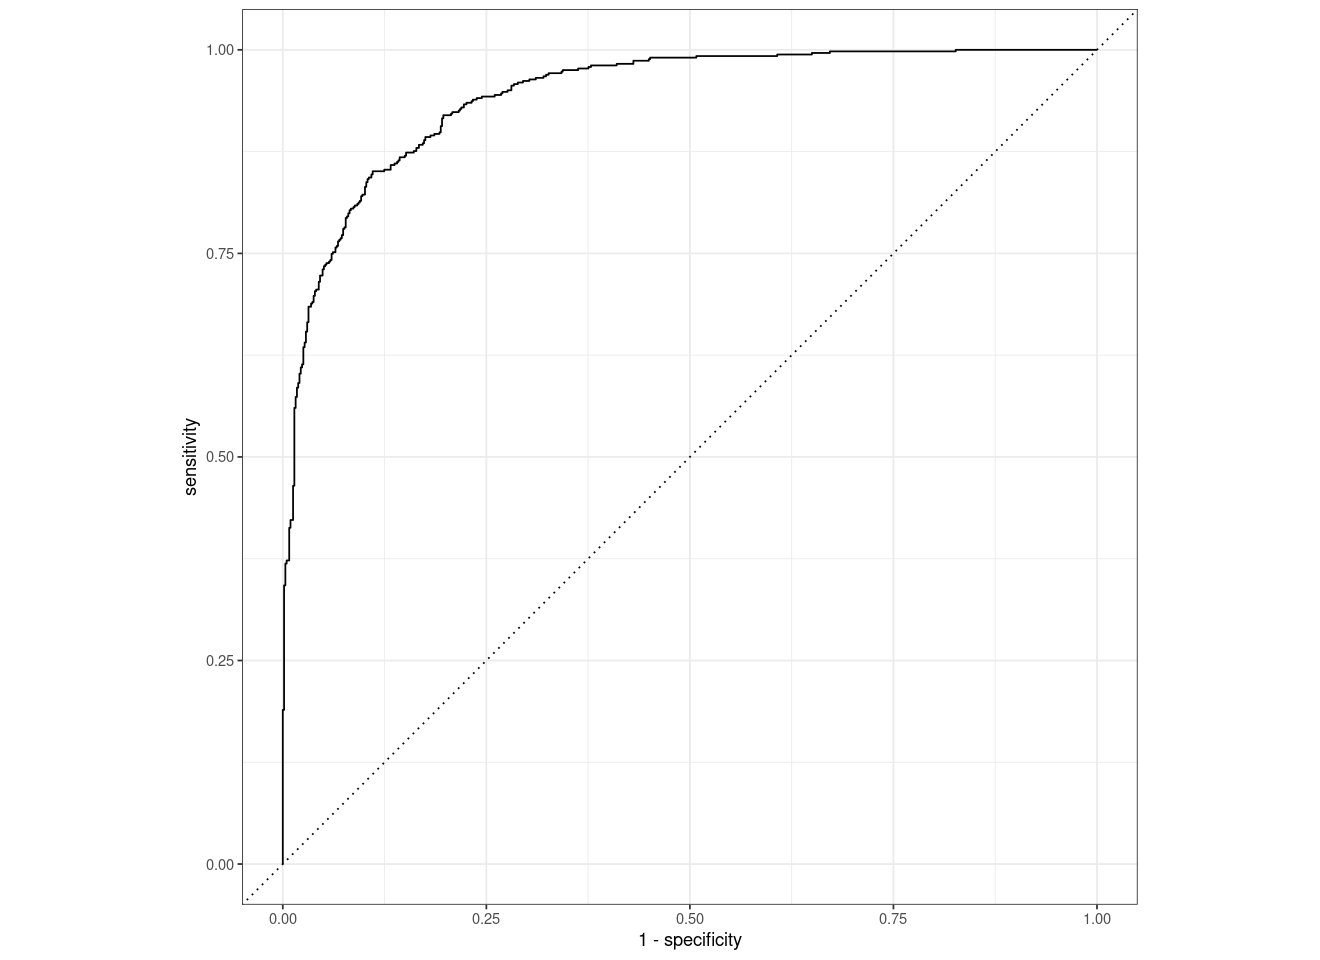

In [18]:
#The Best Model Selection
best_logistic_regression_model <- fit_tune %>% select_best(metric = 'roc_auc')

#Finalizing the Workflow
final_best_wkflw <- cc_logistic_tuned_wkflw %>% finalize_workflow(best_logistic_regression_model)
final_best_wkflw

#Training the best wkflw
cc_final_fit <- final_best_wkflw %>% 
  last_fit(split = initialSplit)

# View performance metrics
cc_final_fit %>% 
  collect_metrics()

# Create an ROC curve
cc_final_fit %>% 
  collect_predictions() %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

#Accuracy after Hyperparameter Tunning 85.2%
#ROC_AUC value - 0.93

## **CONFUSION MATRIX**

In [19]:
#Confusion Matrix
logistic_regression_predictions <- cc_final_fit %>% collect_predictions()
conf_mat(logistic_regression_predictions, truth = customer_status, estimate = .pred_class)

                Truth
Prediction       closed_account active
  closed_account            438     66
  active                     85    568

## Model 2 Training

In [20]:
#Decision Trees Algorithm
decisionTree = decision_tree() %>% 
	set_engine('rpart') %>%
	set_mode('classification')

#Loading the decision tree model, the recipe
decisionTree_wkflw <- workflow() %>% 
	add_model(decisionTree) %>% 
	add_recipe(credit_card_training_recipe)

decisionTree_wkflw_fit <- decisionTree_wkflw %>% 
	last_fit(split = initialSplit)

#Collecting Metrics
decisionTree_wkflw_fit %>%
	collect_metrics


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8867761,Preprocessor1_Model1
roc_auc,binary,0.9141133,Preprocessor1_Model1


In [21]:
#HyperParameter Tunning to improve accuracy
decisionTree_tune <- decision_tree(cost_complexity = tune(),
                               tree_depth = tune(),
                               min_n = tune()) %>% 
  # Specify engine
  set_engine('rpart') %>% 
  # Specify mode
  set_mode('classification')

#Creating a workflow
decisionTree_tune_wkflw <- decisionTree_wkflw %>%
	update_model(decisionTree_tune)

#Doing Grid Search
set.seed(2000)
dt_grid <- grid_random(parameters(decisionTree_tune), size = 10)

#Hyperparameter tuning
decisionTree_tuning <- decisionTree_tune_wkflw %>% 
	tune_grid(resamples = folds,
			 grid = dt_grid,
			 metrics = cc_metrics)

decisionTree_tuning %>% 
	collect_metrics

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
ℹ Please use `hardhat::extract_parameter_set_dials()` instead.”


cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
5.879811e-09,4,6,accuracy,binary,0.8902066,5,0.006380885,Preprocessor1_Model01
5.879811e-09,4,6,roc_auc,binary,0.9301239,5,0.004675624,Preprocessor1_Model01
5.879811e-09,4,6,sens,binary,0.8617081,5,0.016482208,Preprocessor1_Model01
5.879811e-09,4,6,spec,binary,0.9137422,5,0.006573192,Preprocessor1_Model01
2.804361e-04,5,33,accuracy,binary,0.8913573,5,0.003464521,Preprocessor1_Model02
2.804361e-04,5,33,roc_auc,binary,0.9358327,5,0.003175868,Preprocessor1_Model02
2.804361e-04,5,33,sens,binary,0.8757026,5,0.015603061,Preprocessor1_Model02
2.804361e-04,5,33,spec,binary,0.9042685,5,0.011679810,Preprocessor1_Model02
1.814559e-07,11,18,accuracy,binary,0.9066340,5,0.005197193,Preprocessor1_Model03


## Model 2 Performance Evaluation

In [22]:
# Collect detailed tuning results
decisionTree_tuning_results <- decisionTree_tuning %>% 
  collect_metrics(summarize = FALSE)

# Exploring detailed ROC AUC results for each fold
decisionTree_tuning_results %>% 
  filter(.metric == "roc_auc") %>% 
  group_by(id) %>% 
  summarize(min_roc_auc = min(.estimate),
            median_roc_auc = median(.estimate),
            max_roc_auc = max(.estimate))


id,min_roc_auc,median_roc_auc,max_roc_auc
<chr>,<dbl>,<dbl>,<dbl>
Fold1,0.8408521,0.9338399,0.9562290
Fold2,0.8265044,0.9378876,0.9574086
Fold3,0.8319812,0.9326182,0.9467399
Fold4,0.8506621,0.9451664,0.9633800
Fold5,0.9162645,0.9427821,0.9617202


cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1.814559e-07,11,18,roc_auc,binary,0.9570008,5,0.002905629,Preprocessor1_Model03
3.246493e-05,7,34,roc_auc,binary,0.9516181,5,0.004191992,Preprocessor1_Model10
2.088165e-03,13,27,roc_auc,binary,0.9465188,5,0.004298453,Preprocessor1_Model05
7.106222e-07,6,32,roc_auc,binary,0.9457800,5,0.004072190,Preprocessor1_Model06
2.408152e-03,9,28,roc_auc,binary,0.9389386,5,0.004694653,Preprocessor1_Model09


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9239412,Preprocessor1_Model1
roc_auc,binary,0.9553203,Preprocessor1_Model1


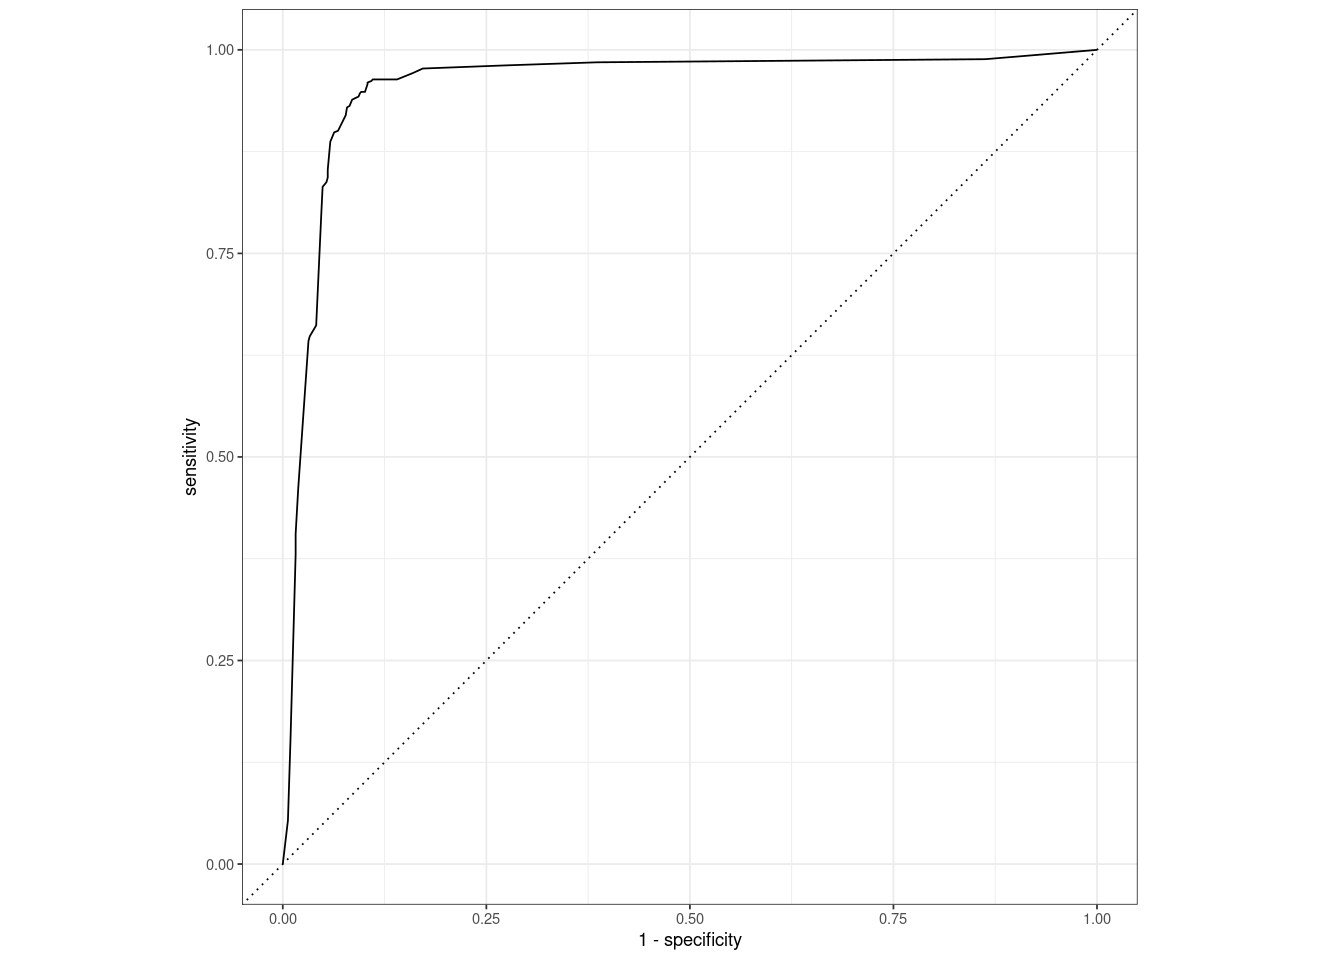

In [23]:
#Display 5 best performing models
decisionTree_tuning %>% 
	show_best(metric = 'roc_auc', n = 5)

#Selecting the best performance workflow
best_dt_model <- decisionTree_tuning %>% select_best(metric = 'roc_auc')

#finalize your workflow
best_final_workflow <- decisionTree_tune_wkflw %>% finalize_workflow(best_dt_model)

#Training the decision tree workflow
dt_final_fit <- best_final_workflow %>% last_fit(split = initialSplit)

#Performance Metrics
dt_final_fit %>% collect_metrics()

#ROC Curve
dt_final_fit %>% 
	collect_predictions() %>% 
	roc_curve(truth = customer_status, .pred_closed_account) %>%
	autoplot()


## **CONFUSION MATRIX**

In [24]:
#Confusion Matrix
dt_predictions <- dt_final_fit %>% collect_predictions()
conf_mat(dt_predictions, truth = customer_status, estimate = .pred_class)

#We have 1067 correct predictions(473 TP & 584 TN) and 100 incorrect predictions(50 FP & 50 FN)

                Truth
Prediction       closed_account active
  closed_account            495     60
  active                     28    574

## Model 3 Training

In [25]:
#Loading the RF Model
rf_model <- rand_forest(mtry = tune(),
					   	trees = tune(),
					   	min_n = tune()) %>% 
			set_engine('ranger', importance = "impurity") %>% 
			set_mode('classification')

#Forming Workflow
rf_workflow <- workflow() %>% 
	add_model(rf_model) %>% 
	add_recipe(credit_card_training_recipe)
rf_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_corr()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Random Forest Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()

Engine-Specific Arguments:
  importance = impurity

Computational engine: ranger 


In [26]:
#Hyper Parameter Tunning
set.seed(300)
rf_grid <- grid_random(mtry() %>% range_set(c(2, 4)),
                       trees(),
                       min_n(),
                       size = 10)

random_forest_tuning <- rf_workflow %>%
						tune_grid(resamples = folds,
								 grid = rf_grid,
								 metrics = cc_metrics)


## Model 3 Performance Evaluation

In [27]:
#Best Results of all the 10 folds

# Collect detailed tuning results
RF_tuning_results <- random_forest_tuning %>% 
  collect_metrics(summarize = FALSE)

# Explore detailed ROC AUC results for each fold
RF_tuning_results %>% 
  filter(.metric == "roc_auc") %>% 
  group_by(id) %>% 
  summarize(min_roc_auc = min(.estimate),
            median_roc_auc = median(.estimate),
            max_roc_auc = max(.estimate))

id,min_roc_auc,median_roc_auc,max_roc_auc
<chr>,<dbl>,<dbl>,<dbl>
Fold1,0.9645335,0.9763988,0.9864671
Fold2,0.9630657,0.9735920,0.9835736
Fold3,0.9594787,0.9692424,0.9813694
Fold4,0.9654040,0.9738979,0.9832132
Fold5,0.9572810,0.9685640,0.9813688


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: rand_forest()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_corr()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Random Forest Model Specification (classification)

Main Arguments:
  mtry = 4
  trees = 1174
  min_n = 12

Engine-Specific Arguments:
  importance = impurity

Computational engine: ranger 


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.9386344,Preprocessor1_Model1
roc_auc,binary,0.9846071,Preprocessor1_Model1


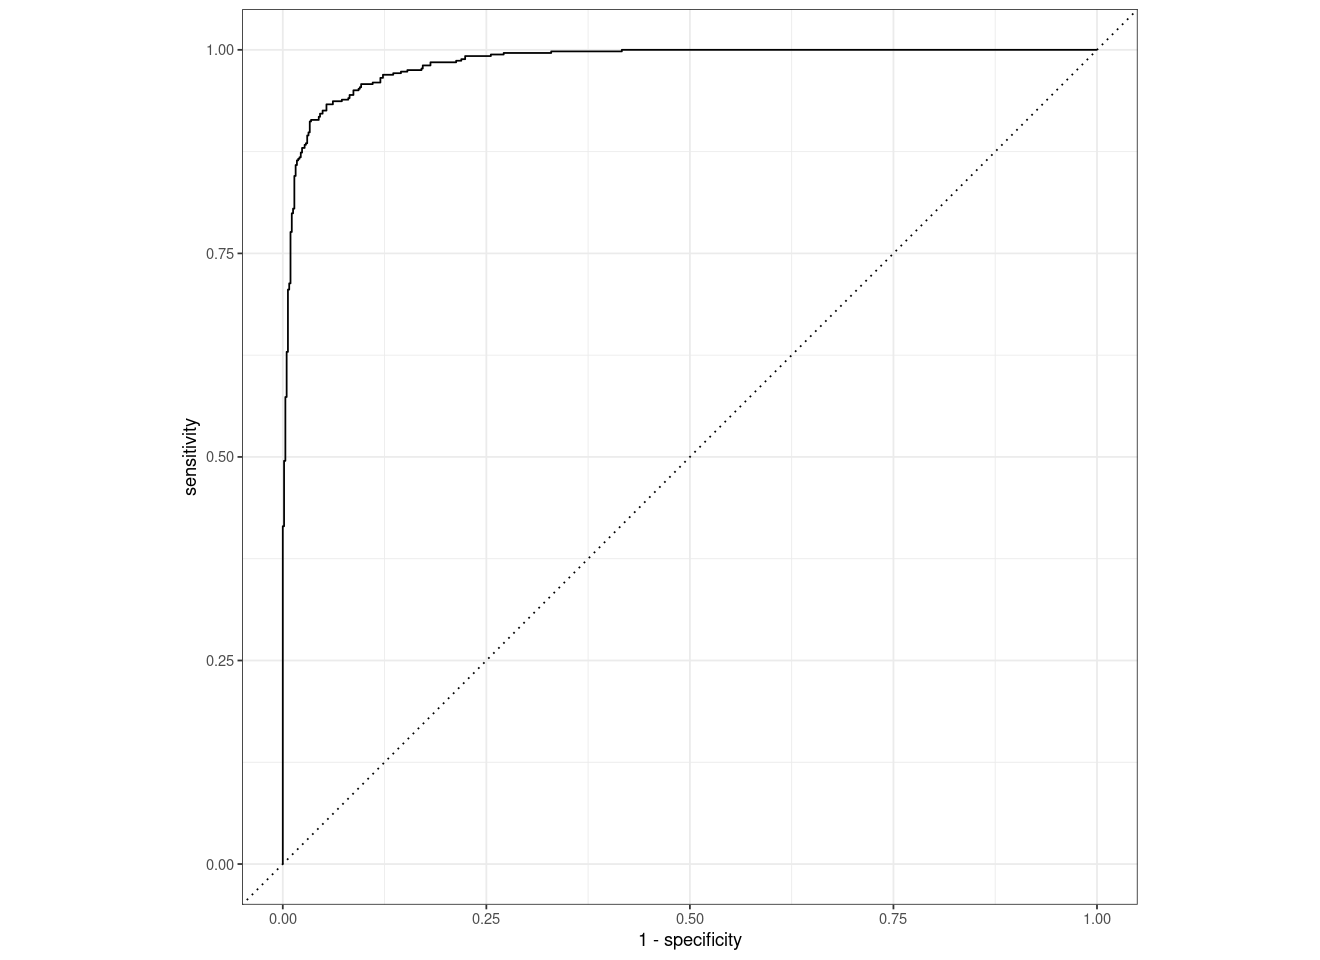

In [28]:
#The Best Model Selection
best_random_forest_model <- random_forest_tuning %>% select_best(metric = 'roc_auc')

#Finalizing the Workflow
final_random_forest_best_wkflw <- rf_workflow %>% finalize_workflow(best_random_forest_model)
final_random_forest_best_wkflw

#Training the best wkflw
rf_final_fit <- final_random_forest_best_wkflw %>% 
  last_fit(split = initialSplit)

# View performance metrics
rf_final_fit %>% 
  collect_metrics()

# Create an ROC curve
rf_final_fit %>% 
  collect_predictions() %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

#Accuracy after Hyperparameter Tunning 93.7%
#ROC_AUC value - 0.98

## **CONFUSION MATRIX**

In [29]:
#Confusion Matrix
rf_predictions <- rf_final_fit %>% collect_predictions()
conf_mat(rf_predictions, truth = customer_status, estimate = .pred_class)

#We have 1084 correct predictions(489 TP & 595 TN) and 73 incorrect predictions(39 FP & 34 FN)

                Truth
Prediction       closed_account active
  closed_account            488     36
  active                     35    598

## **Tabulation of Accuracies and ROC value**

In [30]:
#Tabulation of results
Models = c('Logistic Regression - Before Hyperparameter Tunning','Logistic Regression - After Hyperparameter Tunning', 
		  'Decision Trees - Before Hyperparameter Tuning', 'Decision Trees - After Hyperparameter Tuning', 
		   'Random Forest Algorithm - Hyperparameter Tuned')
Accuracy = c('85.2%','85.2%','89.0%','90.7%','95.0%')
ROC = c('0.92','0.92','0.90','0.96','0.98')

dataFrame = data.frame(Models, Accuracy, ROC)
dataFrame

Models,Accuracy,ROC
<chr>,<chr>,<chr>
Logistic Regression - Before Hyperparameter Tunning,85.2%,0.92
Logistic Regression - After Hyperparameter Tunning,85.2%,0.92
Decision Trees - Before Hyperparameter Tuning,89.0%,0.90
Decision Trees - After Hyperparameter Tuning,90.7%,0.96
Random Forest Algorithm - Hyperparameter Tuned,95.0%,0.98


_**Random Forest Algorithm being the best model with a 95% accuracy and 0.98 ROC value.**_

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction
- The major aim of the Analysis is to find ways why customers close their accounts and to prevent the same in the future.
- Extensive Exploratory and Predictive Analytics have been performed to find out why customers close their credit card accounts.
- The major goal of the analysis is to find ways to predict why the customer closes their credit account account and the reasons for it.
- The EDA part asks questions related to comparisons between combination of certain variables and the customer status variable. These questions helps us to answer the relationship with the customer status variable and how things can be done inorder to prevent the customer from closing their account. Key Findings from the EDA part is discussed below.
- The Predictive Modeling part will help us to identify in what scenarios the customer will exit the bank and to predict it in advance. Several algorithms such as Logistic Regression, Decision Trees and Random Forest Algorithm were tested and the best algorithm was chosen.
- EDA and the Predictive Modeling part will help us to identify the reason for the person to close their credit card account and also to identify with certain variables to predict if the person will close his/her account in the near future.
- 3 models where used that are Logistic Regression, Decision Trees and Random Forest Algorithm where Random Forest is the best algorithm with 93.7% accuracy and ROC value being 0.98.


## Key Findings

- We have a good review from the Q1 summarization where employment status and employment income play an important role. More than 50% of part time employees have closed their credit card accounts. Customers who receive an income of 75 to 100k have a 70% probability of closing their credit card accounts. People who receive an income of 125k and above have a 78% probability of closing their accounts.
- From the Q2 pie chart and statistical summary, We can prove that people owning 1 or 2 accounts having less to no experience with credit cards have a 0.7 probability of having their accounts closed. People owning 3 or more accounts have a 0.7 probability of having their accounts active. 
- If a person owns 1 or 2 accounts and his inactive for 3 to 5 months have a 80% probability of closing their accounts.
- From Q3, The statistical summarization shows a lot of information. If customers have a credit limit of 15 to 20k and owning a silver card have a 80% probability of not closing their account. Credit limit of 5k and owning a blue card customers have a 65% probability of closing their account.
- Married Doctorates having 2-3 dependants have a 60% probability of closing their account. Divorced Doctorates also have a high probability of 70% in closing their accounts.


## Modeling Results
- The best algorithm chosen from the 3 is Random Forest Algorithm with an accuracy of 95%. The ROC value of the algorithm is 0.98 being the highest of all the 3.
- The model was fitted on the test set as well to check the behaviour and the model behaved very well showing great results and predictions.
- ROC AUC metric is used to calculate the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across different thresholds for classifying the positive class which is the closed_account. Compared to all the 3 models we have the ROC curve for the Random forest model much closer to the sensitivity which is the true positive rate showing high accuracy compareed to the rest.
- The accuracy tabulation at the end gives us information about the accuracies of models where logistic regression and decision trees, each having an accuracy of 85% and 90% respectively is less than that of the Random forest model which is 95%.
- This accuracy shows that the model and ROC Curve tends to predict the output accurately for 95% of the times. This particular algorithm can be fitted with values and the prediction can be made.


## Recommendations

- From the Key findings, Important recomendations can be made such as. From the first key finding of Q1 summarization. Customers receiving an income above 75k can be given heavy credit card offers to prevent them from closing their account or they can be charged more when they start defaulting on their credit cards.
- Q2 pie chart and summarization gave us an view on people owning multiple accounts. People owning 1 or 2 accounts can be given 0% APR, additional offers so that they be commited with the company and this will increase the chance of the customer to avoid closing their account. People having 3 or more accounts will have their account active no matter what and so offers for them can be reduced and the charges can be increased respectively as per the requirment.
- People owning 1 or 2 accounts and being inactive can be contacted over the all asking for the reason and certain measures can be taken to have them active.
- Credit Card users having a limit of 5k and owning a blue card can be attracted with many offers as they have a 64% business impact in closing their account.

- Credit Card Features and Benefits: 
Review and enhance credit card features and benefits, particularly for customers with specific credit limits and card types.

1. Supporting Datails: Customers with certain credit limits (15k to 20k) and card types (silver) have shown higher probabilities of not closing their accounts. Enhancing benefits for these segments can improve customer satisfaction and loyalty.
2. Business Impact: By offering attractive features and benefits, the company can retain existing customers and attract new ones, leading to increased card usage and revenue.

- Personalized Customer Support:
Provide personalized customer support for specific customer segments, such as married doctorates with dependents and divorced doctorates.

1. Supporting Details: These segments have shown higher probabilities of closing their accounts. Providing personalized support and tailored solutions can help retain these customers.
2. Business Impact: By offering personalized support, the company can improve customer satisfaction and loyalty, leading to increased customer retention and positive word-of-mouth recommendations.